<a href="https://colab.research.google.com/github/Edu-Moreira/Estudos-de-Python/blob/main/Mercado_Global.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Utilizando biblioteca TVDataFeed para busca no TradingView**

In [2]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 KB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 16.0 MB/s eta 0:00:00
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.9.3
    Uninstalling beautifulsoup4-4.9.3:
      Successfully uninstalled beautifulsoup4-

In [3]:
!pip install --upgrade --no-cache-dir git+https://github.com/StreamAlpha/tvdatafeed.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/StreamAlpha/tvdatafeed.git to /tmp/pip-req-build-s1_2x4uy
  Running command git clone --filter=blob:none --quiet https://github.com/StreamAlpha/tvdatafeed.git /tmp/pip-req-build-s1_2x4uy
  Resolved https://github.com/StreamAlpha/tvdatafeed.git to commit a7034f04509b67224618917c29272796e4fff858
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 4.6 MB/s eta 0:00:00
  Created wheel for tvdatafeed: filename=tvdatafeed-2.1.0-py3-none-any.whl size=7566 sha256=3c8c9e62a7a58a2c6babfda0e7cecf6e998826e048ba873a487a766407cbbbe8
  Stored in directory: /tmp/pip-ephem-wheel-cache-26kvdc3g/wheels/a4/80/7a/04bbe70838a72f13c4511eb1b4baf894bf0b3a559ca4287aa5
Successfully built tvdatafeed


In [34]:
import pandas as pd
import seaborn as srn
import statistics  as sts

import yfinance as yf

from tvDatafeed import TvDatafeed, Interval

from datetime import date

In [5]:
username = 'YourTradingViewUserName'
password = 'YourTradingViewPassword'

# É possível coletar os dados sem fornecer dados de usuário e senha

tv = TvDatafeed(username,password)

ERROR:tvDatafeed.main:error while signin


#### **Juros**

#####Será coletado dados de mercado como juros, câmbio e principais índices de ações para os sequintes países:

- Zona do Euro 
- Estados Unidos
- China
- Brasil
- India
- Russia
- Africa do Sul
- Alemanha
- França
- Reino Unido
- Mexico


Começando com Brasil juros para os vencimentos com ticker BR01Y, BR02Y, BR05Y E BR10Y

In [6]:
verticesbr= ['BR01Y','BR02Y','BR05Y','BR10Y']
verticesus= ['US01Y','US02Y','US05Y','US10Y']
verticescn=['CN01Y','CN02Y','CN05Y','CN10Y']
verticeseu=['EU01Y','EU02Y','EU05Y','EU10Y']
verticesin=['IN01Y','IN02Y','IN05Y','IN10Y']
verticesde=['DE01Y','DE02Y','DE05Y','DE10Y']

In [7]:

#### Busca o histórico dos juros e formata o DataFrame para incluir o nome do País e unificar o nome das colunas
#### Os dados são coletados em um frame de cotações diárias e tenta buscar até 750 dias limitado à base existente

painelBR = pd.DataFrame()
for i in verticesbr:
  painelBR[i] = tv.get_hist(i,'TVC',Interval.in_daily,750)['close']
painelBR['País'] = 'Brasil'
painelBR = painelBR.dropna()
painelBR.columns = ['1 Ano','2 Anos','5 Anos','10 Anos','Pais']
  
painelUS = pd.DataFrame()
for i in verticesus:
  painelUS[i] = tv.get_hist(i,'TVC',Interval.in_daily,750)['close']
painelUS['País'] = 'Estados Unidos'
painelUS = painelUS.dropna()
painelUS.columns = ['1 Ano','2 Anos','5 Anos','10 Anos','Pais']

painelCN = pd.DataFrame()
for i in verticescn:
  painelCN[i] = tv.get_hist(i,'TVC',Interval.in_daily,750)['close']
painelCN['País'] = 'China'
painelCN = painelCN.dropna()
painelCN.columns = ['1 Ano','2 Anos','5 Anos','10 Anos','Pais']

painelEU = pd.DataFrame()
for i in verticeseu:
  painelEU[i] = tv.get_hist(i,'TVC',Interval.in_daily,750)['close']
painelEU['País'] = 'Zona do Euro'
painelEU = painelEU.dropna()
painelEU.columns = ['1 Ano','2 Anos','5 Anos','10 Anos','Pais']

painelIN = pd.DataFrame()
for i in verticesin:
  painelIN[i] = tv.get_hist(i,'TVC',Interval.in_daily,750)['close']
painelIN['País'] = 'India'
painelIN = painelIN.dropna()
painelIN.columns = ['1 Ano','2 Anos','5 Anos','10 Anos','Pais']

painelDE = pd.DataFrame()
for i in verticesde:
  painelDE[i] = tv.get_hist(i,'TVC',Interval.in_daily,750)['close']
painelDE['País'] = 'Alemanha'
painelDE = painelDE.dropna()
painelDE.columns = ['1 Ano','2 Anos','5 Anos','10 Anos','Pais']

In [8]:
jurosglb = pd.concat([painelBR,painelUS,painelCN,painelEU,painelIN,painelDE])

In [9]:
jurosglb

,1 Ano,2 Anos,5 Anos,10 Anos,Pais
datetime,,,,,
2020-04-16 21:00:00,3.230,4.887,5.9999,7.050,Brasil
2020-04-19 21:00:00,3.290,4.887,6.0700,7.070,Brasil
2020-04-20 21:00:00,2.970,4.887,5.8600,6.960,Brasil
2020-04-21 21:00:00,2.780,4.887,5.7400,6.880,Brasil
2020-04-22 21:00:00,2.810,4.887,5.9900,7.120,Brasil
...,...,...,...,...,...
2023-03-08 22:00:00,3.349,3.231,2.7590,2.609,Alemanha
2023-03-09 22:00:00,3.226,3.022,2.6000,2.465,Alemanha
2023-03-12 21:00:00,2.929,2.631,2.3070,2.259,Alemanha


#### **Moedas**

### ***Moedas a serem analizadas***

 #### Real Brasileiro
 #### Dólar Australiano
 #### Dólar Canadense
 #### Peso Chileno
 #### Peso Colombiano
 #### Dólar Neozelandês
 #### Rand Sul_Africano
 #### Rupia Indiana
 #### Peso Mexicano
 #### Lira Turca
 #### Rublo Russo
 #### EURO
 #### YUAN Chinês

In [74]:
moedasyf = ['BRL=X','AUD=X','CAD=X','CLP=X','COP=X','NZD=X','ZAR=X','INR=X','MXN=X','TRY=X','CNY=X','EUR=X','DX=F']

In [75]:
moedaspainelyf = pd.DataFrame()
for i in moedasyf:
  moedaspainelyf[i] = yf.download(i,'2012-01-01', '2023-03-14').Close


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [76]:
moedaspainelyf.columns = ['BRL','AUD','CAD','CLP','COP','NZD','ZAR','INR','MXN','TRY','CNY','EUR','DXY']

In [17]:
moedaspainelyf.loc['2015-02-10':'2015-02-20']

,BRL,AUD,CAD,CLP,COP,NZD,ZAR,INR,MXN,TRY,CNY,EUR
Date,,,,,,,,,,,,
2015-02-10,2.7663,1.2822,1.24739,623.750000,2381.000000,1.3510,11.57460,62.130001,14.94595,2.47473,6.2388,0.88285
2015-02-11,2.8311,1.2847,1.25840,625.500000,2404.500000,1.3479,11.67961,62.341999,15.06900,2.49431,6.2318,0.88324
2015-02-12,2.8655,1.2949,1.26170,629.500000,2388.500000,1.3558,11.79740,62.382000,14.92300,2.49811,6.2323,0.88402
2015-02-13,2.8170,1.2892,1.25092,622.250000,2381.500000,1.3453,11.70423,62.169998,14.87748,2.46750,6.2345,0.87689
2015-02-16,2.8309,1.2877,1.24542,618.200012,2341.300049,1.3370,11.64480,62.069000,14.91509,2.45597,6.2303,0.87719
2015-02-17,2.8260,1.2892,1.24746,621.150024,24.150000,1.3360,11.63420,62.186001,14.90900,2.45486,6.2386,0.88230
2015-02-18,2.8257,1.2801,1.23908,619.250000,2431.000000,1.3264,11.67153,62.112000,14.86100,2.45150,6.2441,0.87683
2015-02-19,2.8340,1.2807,1.24550,619.099976,2438.000000,1.3243,11.58870,62.074001,15.00008,2.44331,6.2441,0.87719
2015-02-20,2.8633,1.2828,1.24903,618.299988,24.500000,1.3299,11.66740,62.165001,15.01766,2.45320,6.2441,0.87976


In [77]:
cesta  =pd.DataFrame()

cesta['BRL'] = moedaspainelyf.BRL

cesta['DXY'] = moedaspainelyf.DXY

cesta['Pares'] = 0.35*(moedaspainelyf.AUD**0.1992) * (moedaspainelyf.CAD**0.2427)* ((moedaspainelyf.CLP / 100)**0.1964) * ((moedaspainelyf.COP / 1000)**0.3311) * (moedaspainelyf.NZD**0.1753) * (moedaspainelyf.ZAR**0.2049)* ((moedaspainelyf.INR / 10)**0.3427) * ((moedaspainelyf.MXN / 10)**0.2622)* (moedaspainelyf.TRY**0.0532)

outline = 0.8*cesta['Pares'].shift(1)

cesta['Pares'] = cesta.loc[cesta['Pares']> outline,'Pares'] 

cesta = cesta.dropna()


<AxesSubplot:xlabel='Date'>

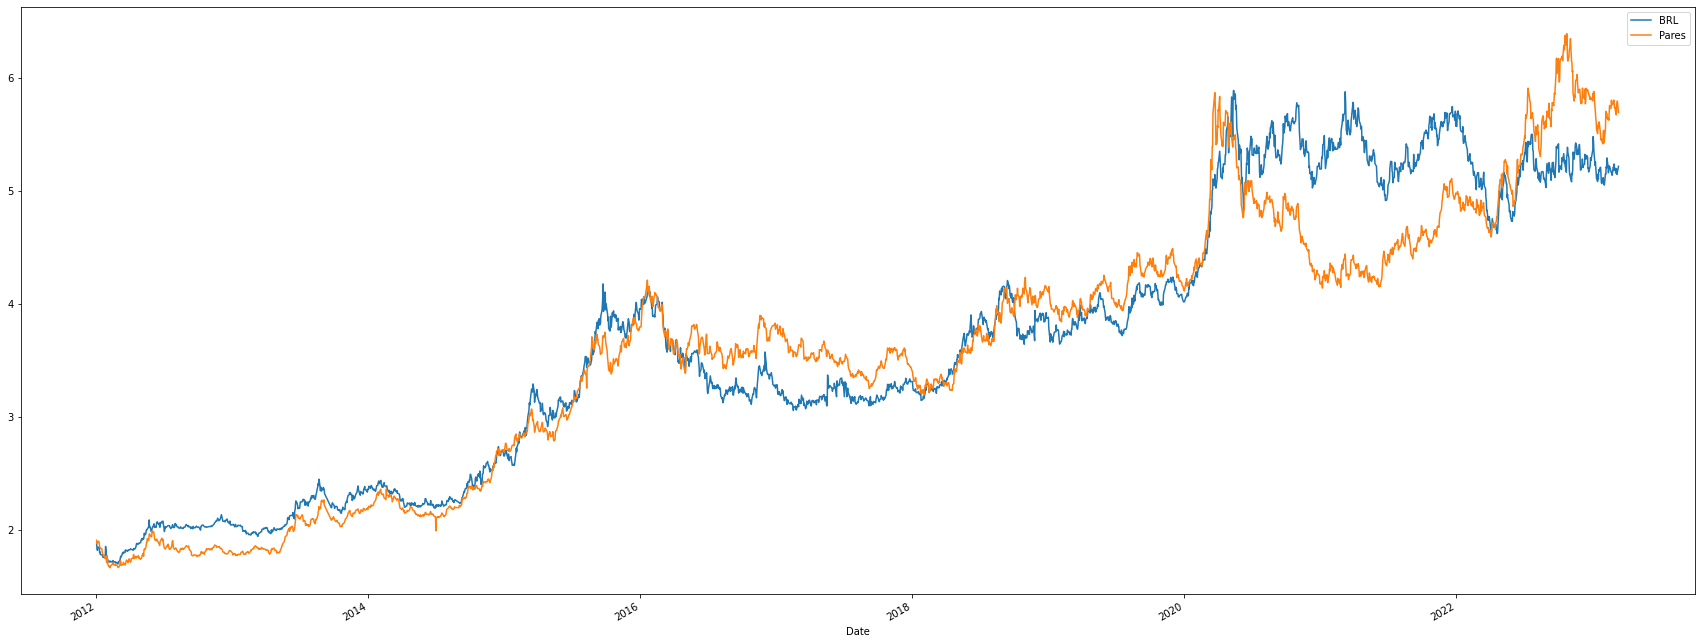

In [82]:
cesta[['BRL','Pares']].plot(figsize=(30,12))

In [ ]:
DXY = yf.download('DX=F','2012-01-01', '2023-03-14').Close

In [ ]:
DXY.plot()